## <p style="background-color:white;font-family:newtimeroman;color:blue;font-size:230%;text-align:center;border-radius:20px 60px;"> Walmart Weekly Sales Prediction </p>

![](https://t3.ftcdn.net/jpg/02/83/63/72/360_F_283637207_0y1yfEt0ezlc6rApTaBK73PiLAkYxrPo.jpg)

# Predicting future sales for a company is one of the most important aspects of strategic planning. 


Aim - Provide actionable insights like potential inventory management improvements, recommendations, marketing campaign adjustments, or pricing strategy optimizations, and factors affecting sales to help stakeholders make data-driven decisions. 

Definition-
Analyze historical sales data from a retail or e-commerce company to develop a sales forecasting model. 
Use techniques such as time series analysis, ARIMA, or machine learning algorithms to predict future sales.
predict sales figures for the desired time horizon (e.g., weekly, monthly, or quarterly) and the level of granularity (e.g., product category wise or store wise). 
Share the evaluation metrics of the model, such as Mean Absolute Error (MAE), Root Mean Square Error (RMSE), or Mean Absolute Percentage Error (MAPE) to understand the accuracy.

In [132]:
#import lib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data description - 



There are 3 Datasets :

Stores:

Store: The store number. Range from 1–45.
Type: Three types of stores ‘A’, ‘B’ or ‘C’.
Size: Sets the size of a Store would be calculated by the no. of products available in the particular store ranging from 34,000 to 210,000.

primary key is Store

Sales:

-Date: The date of the week where this observation was taken.
-Weekly_Sales: The sales recorded during that Week.
-Store: The store which observation in recorded 1–45
-Dept: One of 1–99 that shows the department.
-IsHoliday: Boolean value representing a holiday week or not.

primary key is a combination of (Store,Dept,Date).

Features:

-Temperature: Temperature of the region during that week.
-Fuel_Price: Fuel Price in that region during that week.
-MarkDown1:5 : Represents the Type of markdown and what quantity was available during that week.
-CPI: Consumer Price Index during that week.
-Unemployment: The unemployment rate during that week in the region of the store.

primary key is Store and Date

In [75]:
#load 3 data sets and combine to one

walmart_store=pd.read_csv("/Users/geethika/Downloads/walmart-recruiting-store-sales-forecasting/stores.csv")
walmart_feature= pd.read_csv("/Users/geethika/Downloads/walmart-recruiting-store-sales-forecasting/features.csv")
walmart= pd.read_csv("/Users/geethika/Downloads/walmart-recruiting-store-sales-forecasting/train.csv")

In [56]:
walmart_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [57]:
walmart_feature.head(200)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
195,2,2010-05-07,71.28,2.835,NaN,NaN,NaN,NaN,NaN,210.001102,8.200,False
196,2,2010-05-14,73.31,2.854,NaN,NaN,NaN,NaN,NaN,209.998458,8.200,False
197,2,2010-05-21,74.83,2.826,NaN,NaN,NaN,NaN,NaN,210.276844,8.200,False
198,2,2010-05-28,81.13,2.759,NaN,NaN,NaN,NaN,NaN,210.555230,8.200,False


In [58]:
walmart.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


# Group by Store

Since we are am predicting the weekly sales for Store level, we will grouping the data in walmart dataset to avoid the department and take the sum of department sales to store level

In [76]:
#considering only the field you need , only 3 fields
walmart_store_group=walmart.groupby(["Store","Date"])[["Weekly_Sales"]].sum()
walmart_store_group.reset_index(inplace=True)

In [60]:
walmart_store_group.head()

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68


# Merging all the datasets into one place for easier test and analysis.

In [77]:
result = pd.merge(walmart_store_group, walmart_store, how='inner', on='Store', left_on=None, right_on=None,
        left_index=False, right_index=False, sort=False,
        suffixes=('_x', '_y'), copy=True, indicator=False)

data = pd.merge(result, walmart_feature, how='inner', on=['Store','Date'], left_on=None, right_on=None,
        left_index=False, right_index=False, sort=False,
        suffixes=('_x', '_y'), copy=True, indicator=False)


In [29]:
print(data.shape)

(6435, 15)


# Data Cleaning 

In [62]:
data.head()

,Store,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1643690.90,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,1641957.44,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,1611968.17,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,1409727.59,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,1554806.68,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [63]:
data.isnull().sum()

Store              0
Date               0
Weekly_Sales       0
Type               0
Size               0
Temperature        0
Fuel_Price         0
MarkDown1       4155
MarkDown2       4798
MarkDown3       4389
MarkDown4       4470
MarkDown5       4140
CPI                0
Unemployment       0
IsHoliday          0
dtype: int64

<AxesSubplot: >

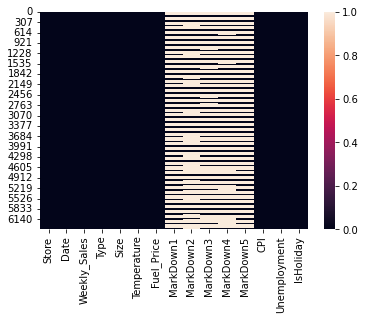

In [64]:
sns.heatmap(data.isnull())

In [65]:
data.describe()

,Store,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,2280.000000,1637.000000,2046.000000,1965.000000,2295.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,130287.600000,60.663782,3.358607,6855.587430,3218.965504,1349.853021,3303.858142,4435.262240,171.578394,7.999151
std,12.988182,5.643666e+05,63117.022465,18.444933,0.459020,8183.310015,9268.082387,9287.242800,6211.203947,5868.933325,39.356712,1.875885
min,1.000000,2.099862e+05,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,12.000000,5.533501e+05,70713.000000,47.460000,2.933000,1679.190000,37.200000,4.700000,483.270000,1702.565000,131.735000,6.891000
50%,23.000000,9.607460e+05,126512.000000,62.670000,3.445000,4972.590000,187.040000,22.700000,1419.420000,3186.520000,182.616521,7.874000
75%,34.000000,1.420159e+06,202307.000000,74.940000,3.735000,8873.582500,1785.290000,99.987500,3496.080000,5422.080000,212.743293,8.622000
max,45.000000,3.818686e+06,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 6434
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Type          6435 non-null   object 
 4   Size          6435 non-null   int64  
 5   Temperature   6435 non-null   float64
 6   Fuel_Price    6435 non-null   float64
 7   MarkDown1     2280 non-null   float64
 8   MarkDown2     1637 non-null   float64
 9   MarkDown3     2046 non-null   float64
 10  MarkDown4     1965 non-null   float64
 11  MarkDown5     2295 non-null   float64
 12  CPI           6435 non-null   float64
 13  Unemployment  6435 non-null   float64
 14  IsHoliday     6435 non-null   bool   
dtypes: bool(1), float64(10), int64(2), object(2)
memory usage: 760.4+ KB


# Exploratory Data Analysis

Feature encoding

In [67]:
#encoding categorical variables
#nominal (boolean and order doesnt matter) lets use map function to assign True 1, False 0

data['IsHoliday']=data['IsHoliday'].map(lambda x: 1 if x==True else 0)

In [81]:
data.head()

,Store,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1643690.90,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
1,1,2010-02-12,1641957.44,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1
2,1,2010-02-19,1611968.17,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0
3,1,2010-02-26,1409727.59,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0
4,1,2010-03-05,1554806.68,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0


<AxesSubplot: xlabel='IsHoliday', ylabel='Weekly_Sales'>

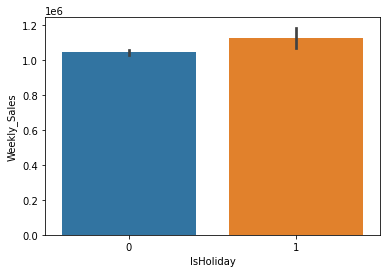

In [102]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=data)

In [111]:
df_holiday = data.loc[data['IsHoliday']==1]
df_holiday['Date'].nunique() #count
#df_holiday['Date'].unique() 

10

In [108]:
df_not_holiday = data.loc[data['IsHoliday']==0]
df_not_holiday['Date'].nunique() 

133

There are 4 holiday values such as;

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

 When we look at the data, average weekly sales for holidays are significantly higher than not-holiday days.
 In train data, there are 133 weeks for non-holiday and 10 weeks for holiday.

In [115]:
# Super bowl dates in train set
data.loc[(data['Date'] == '2010-02-12')|(data['Date'] == '2011-02-11')|(data['Date'] == '2012-02-10'),'Super_Bowl'] = 1
data.loc[(data['Date'] != '2010-02-12')&(data['Date'] != '2011-02-11')&(data['Date'] != '2012-02-10'),'Super_Bowl'] = 0

In [116]:
# Labor day dates in train set
data.loc[(data['Date'] == '2010-09-10')|(data['Date'] == '2011-09-09')|(data['Date'] == '2012-09-07'),'Labor_Day'] = 1
data.loc[(data['Date'] != '2010-09-10')&(data['Date'] != '2011-09-09')&(data['Date'] != '2012-09-07'),'Labor_Day'] = 0

In [117]:
# Thanksgiving dates in train set
data.loc[(data['Date'] == '2010-11-26')|(data['Date'] == '2011-11-25'),'Thanksgiving'] = 1
data.loc[(data['Date'] != '2010-11-26')&(data['Date'] != '2011-11-25'),'Thanksgiving'] = 0


In [118]:
#Christmas dates in train set
data.loc[(data['Date'] == '2010-12-31')|(data['Date'] == '2011-12-30'),'Christmas'] = 1
data.loc[(data['Date'] != '2010-12-31')&(data['Date'] != '2011-12-30'),'Christmas'] = 0

<AxesSubplot: xlabel='Christmas', ylabel='Weekly_Sales'>

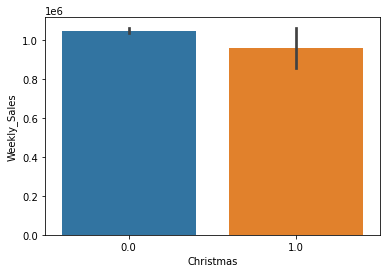

In [120]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=data) # Christmas holiday vs not-Christmas

<AxesSubplot: xlabel='Thanksgiving', ylabel='Weekly_Sales'>

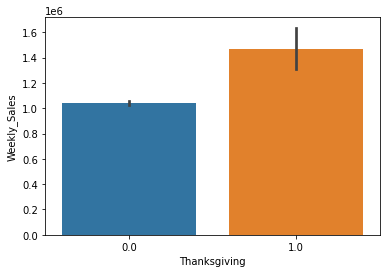

In [121]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=data) # Thanksgiving holiday vs not-thanksgiving

<AxesSubplot: xlabel='Super_Bowl', ylabel='Weekly_Sales'>

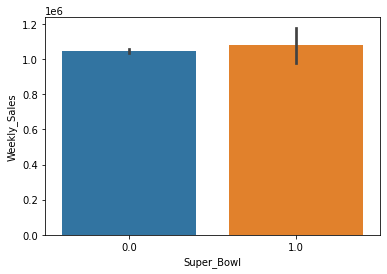

In [122]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=data) # Super bowl holiday vs not-super bowl

<AxesSubplot: xlabel='Labor_Day', ylabel='Weekly_Sales'>

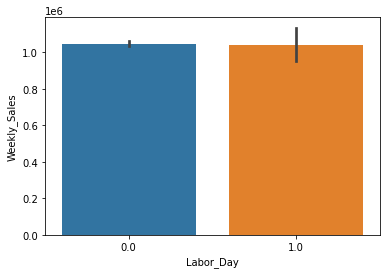

In [123]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=data) # Labor day holiday vs not-labor day

# Lets see the impact of Holidays on each store type in the dataset
There are three different store types in the data as A, B and C.

In [127]:
data.groupby(['Christmas','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Christmas 

Christmas  Type
0.0        A       1.378340e+06
           B       8.236929e+05
           C       4.736897e+05
1.0        A       1.259184e+06
           B       7.737901e+05
           C       3.968342e+05
Name: Weekly_Sales, dtype: float64

In [128]:
data.groupby(['Labor_Day','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Labor Day

Labor_Day  Type
0.0        A       1.376694e+06
           B       8.233473e+05
           C       4.722717e+05
1.0        A       1.375731e+06
           B       8.065523e+05
           C       4.886257e+05
Name: Weekly_Sales, dtype: float64

In [129]:
data.groupby(['Thanksgiving','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Thanksgiving

Thanksgiving  Type
0.0           A       1.369324e+06
              B       8.165990e+05
              C       4.725449e+05
1.0           A       1.894801e+06
              B       1.273908e+06
              C       4.775417e+05
Name: Weekly_Sales, dtype: float64

In [130]:
data.groupby(['Super_Bowl','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Super Bowl

Super_Bowl  Type
0.0         A       1.375710e+06
            B       8.226116e+05
            C       4.720662e+05
1.0         A       1.421655e+06
            B       8.408851e+05
            C       4.982183e+05
Name: Weekly_Sales, dtype: float64

# Percentages of store types

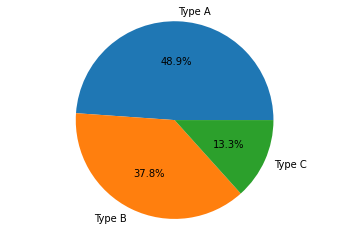

In [136]:
my_data = [48.88, 37.77 , 13.33 ]  #percentages
my_labels = 'Type A','Type B', 'Type C' # labels
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%') 
plt.axis('equal')
plt.show()

In [82]:
data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday         int64
dtype: object

In [83]:
# Now converting "Date"  to date time
data["Date"]=pd.to_datetime(data.Date)

# Extracting details from date given. so that can be used for seasonal checks or grouping

data["Day"]=data.Date.dt.day
data["Month"]=data.Date.dt.month
data["Year"]=data.Date.dt.year

In [ ]:
# Changing the Months value from numbers to real values like Jan, Feb to Dec 
data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x])

In [87]:
#add a 'week' column to the dataset for analysis
data['Week'] = data.Date.dt.isocalendar().week 

In [88]:
data.head()

,Store,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Month,Year,Week
0,1,2010-02-05,1643690.90,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010,5
1,1,2010-02-12,1641957.44,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1,12,2,2010,6
2,1,2010-02-19,1611968.17,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0,19,2,2010,7
3,1,2010-02-26,1409727.59,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0,26,2,2010,8
4,1,2010-03-05,1554806.68,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0,5,3,2010,9


# Yearly sales

In [157]:
data.groupby('Year')['Weekly_Sales'].mean() # to see the best years for sales

Year
2010    1.059670e+06
2011    1.046239e+06
2012    1.033660e+06
Name: Weekly_Sales, dtype: float64

# Vizualizing yearly sales over the months

<AxesSubplot: xlabel='Month'>

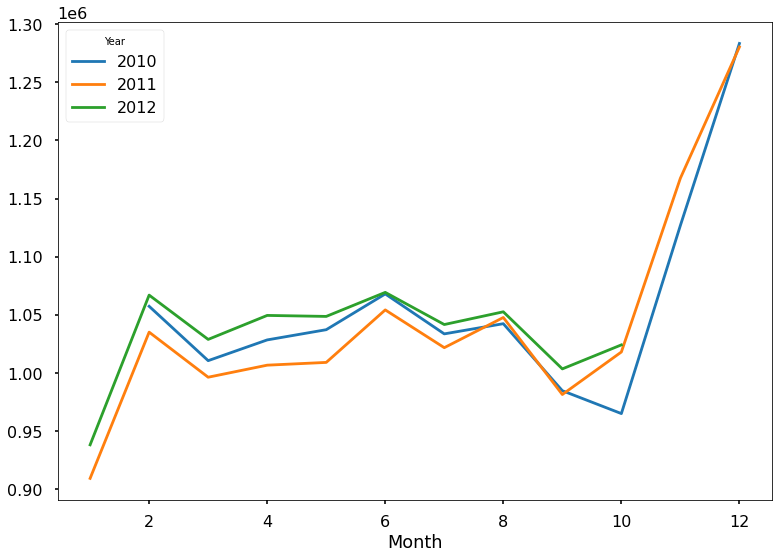

In [158]:
monthly_sales = pd.pivot_table(data, values = "Weekly_Sales", columns = "Year", index = "Month")
monthly_sales.plot()

# Weekly sales over the months

In [161]:
df_months = data.groupby('Month').sum()

import plotly.express as px
fig = px.line( data_frame = df_months, x = df_months.index, y = 'Weekly_Sales', 
              labels = {'Weekly_Sales' : 'Weekly Sales', 'x' : 'Month' }, 
              title = 'Sales over months')
fig.update_traces(line_color='blue', line_width=3)

/var/folders/hc/qmt_vj3173n7q749wwk377700000gn/T/ipykernel_27872/4166559715.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



#  yearly sales over the weeks

<AxesSubplot: xlabel='Week'>

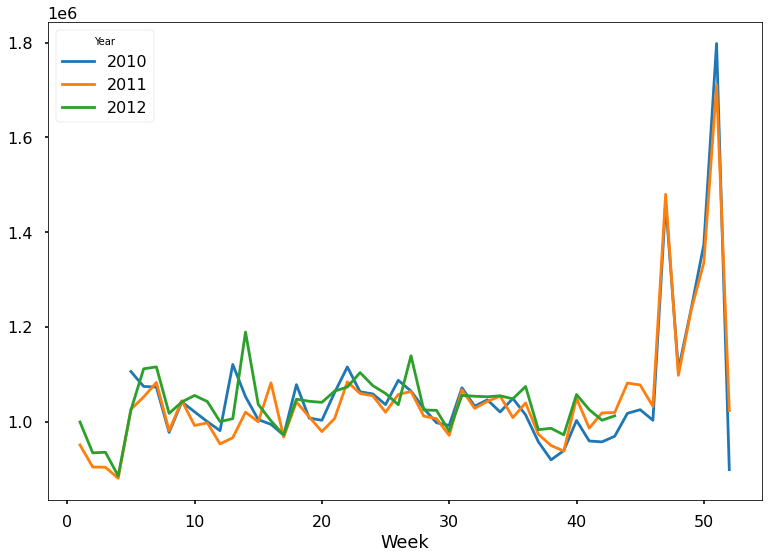

In [163]:
weekly_sales = pd.pivot_table(data, values = "Weekly_Sales", columns = "Year", index = "Week")
weekly_sales.plot()

#   sales over the weeks

In [142]:
df_weeks = data.groupby('Week').sum()

import plotly.express as px
fig = px.line( data_frame = df_weeks, x = df_weeks.index, y = 'Weekly_Sales', 
              labels = {'Weekly_Sales' : 'Weekly Sales', 'x' : 'Weeks' }, 
              title = 'Sales over weeks')
fig.update_traces(line_color='blue', line_width=3)

/var/folders/hc/qmt_vj3173n7q749wwk377700000gn/T/ipykernel_27872/3194146975.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [151]:
df_weeks.head()

,Store,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Month,Year,Super_Bowl,Labor_Day,Thanksgiving,Christmas
Week,,,,,,,,,,,,,,,,,,,,
1,2070,8.773121e+07,11725884,3438.27,287.489,214551.50,956964.10,5105.11,44069.57,223036.75,15421.135275,710.979,0,585,90,181035,0.0,0.0,0.0,0.0
2,2070,8.269676e+07,11725884,3167.09,291.404,148560.51,420168.49,3172.06,22332.89,165721.27,15430.151991,710.979,0,1215,90,181035,0.0,0.0,0.0,0.0
3,2070,8.273564e+07,11725884,3476.88,293.341,104001.81,141268.63,3098.39,27717.05,122143.56,15443.190027,710.979,0,1845,90,181035,0.0,0.0,0.0,0.0
4,2070,7.943483e+07,11725884,3455.57,294.581,63331.86,74200.84,3089.75,4254.13,116290.60,15456.228061,710.979,0,2475,90,181035,0.0,0.0,0.0,0.0
5,3105,1.419895e+08,17588826,4919.52,418.696,1624211.71,126542.47,6408.63,1286593.08,267767.25,23017.155918,1098.848,0,540,270,271485,0.0,0.0,0.0,0.0


# Weekly Sales by store

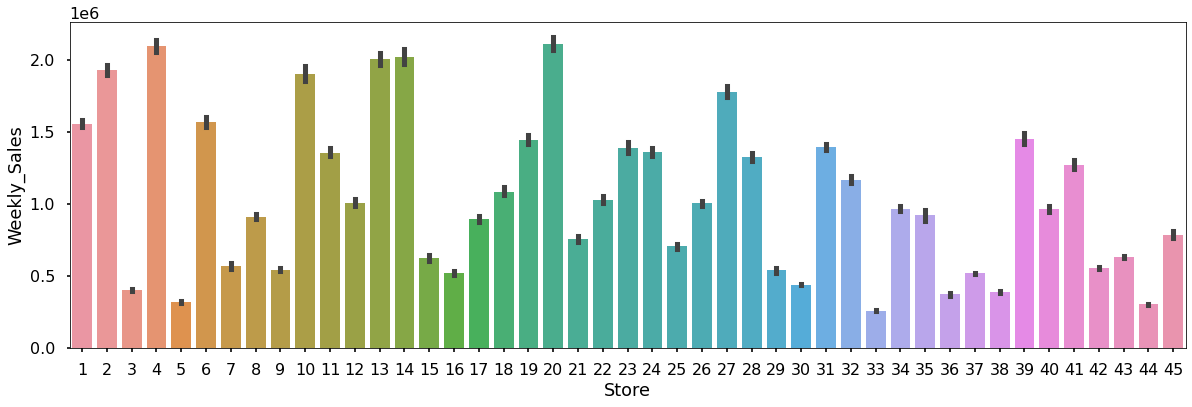

In [155]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=data)

# Fuel Price, CPI , Unemployment , Temperature Effects¶


Lets see how these external factors effects the weekly sales

<AxesSubplot: xlabel='Fuel_Price'>

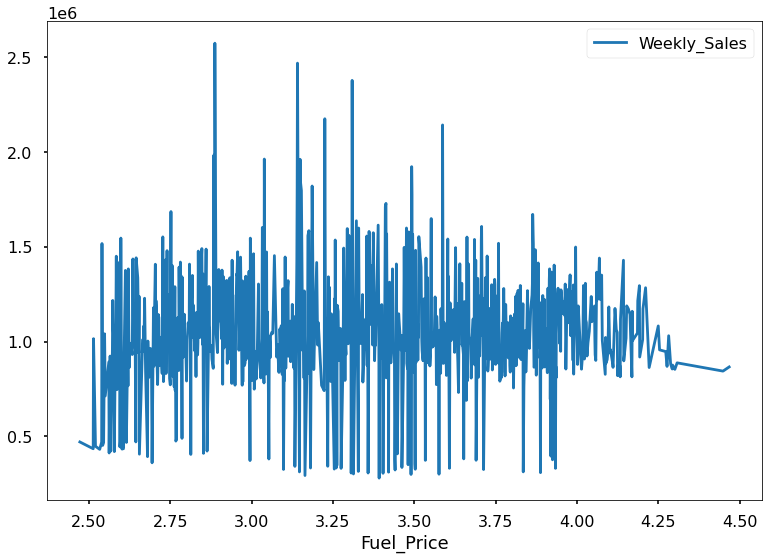

In [164]:
fuel_price = pd.pivot_table(data, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

<AxesSubplot: xlabel='Temperature'>

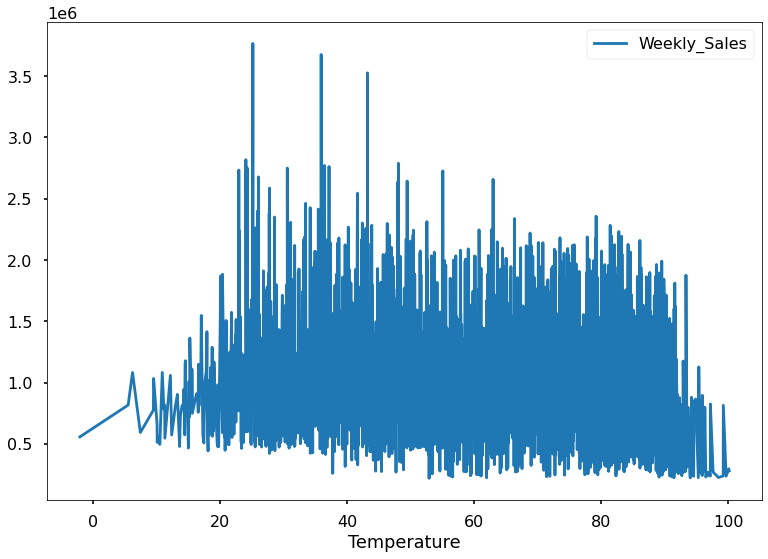

In [166]:
temp = pd.pivot_table(data, values = "Weekly_Sales", index= "Temperature")
temp.plot()

<AxesSubplot: xlabel='CPI'>

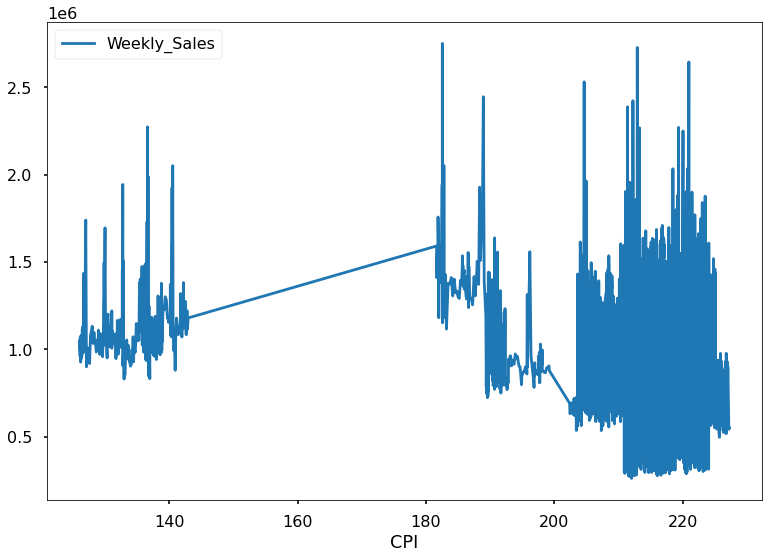

In [167]:
CPI = pd.pivot_table(data, values = "Weekly_Sales", index= "CPI")
CPI.plot()

<AxesSubplot: xlabel='Unemployment'>

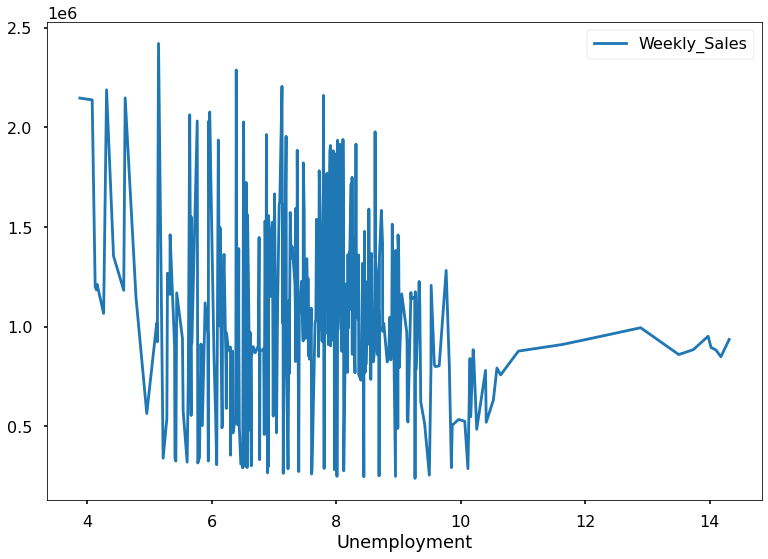

In [168]:
unemployment = pd.pivot_table(data, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

# Checking the relationship of features with weekly sales with Correlation marix

/var/folders/hc/qmt_vj3173n7q749wwk377700000gn/T/ipykernel_27872/844435167.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



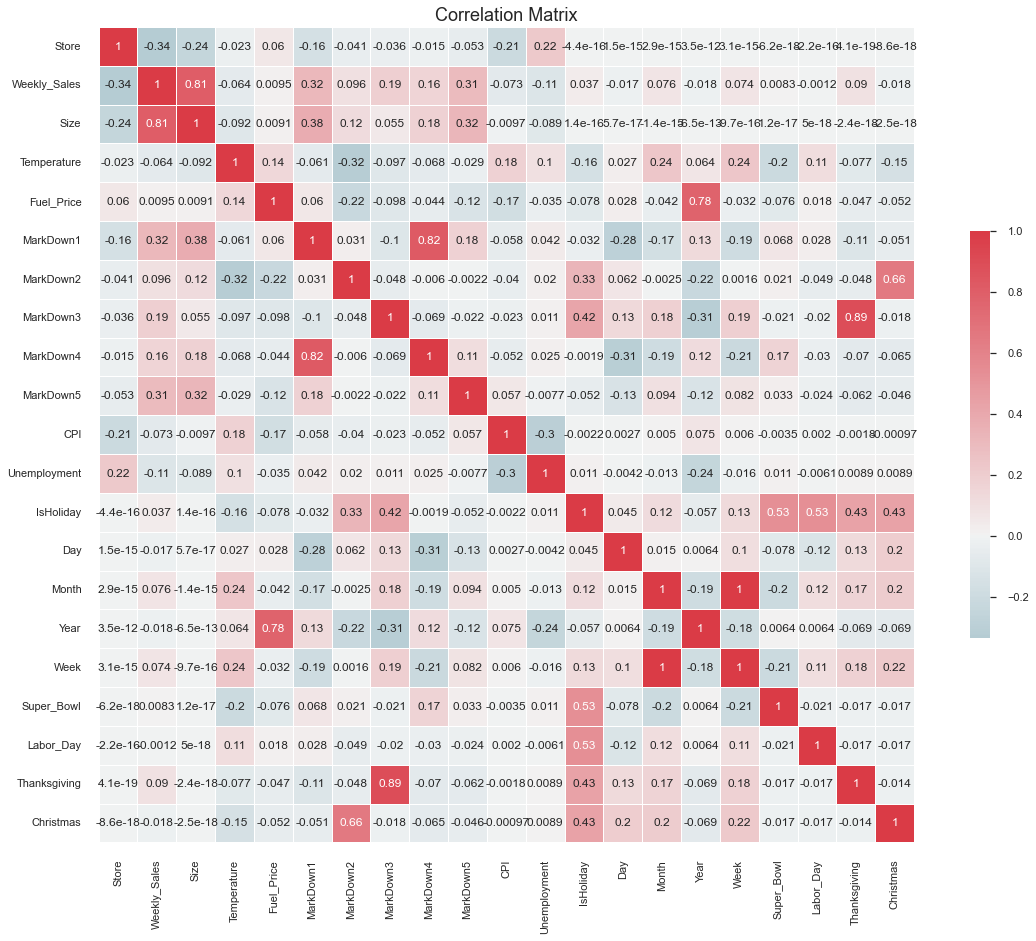

In [180]:
sns.set(style="white")

corr = data.corr()
f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(corr,  cmap=cmap, vmax=1, center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

# Sales vs Markdown

In [100]:
import plotly.graph_objs as go
from plotly import tools

fig = go.Figure()

#fig.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['Weekly_Sales'], name = 'Weekly Sales', mode = 'lines') )
fig.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown1'], name = 'MarkDown1', mode = 'lines') )
fig.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown2'], name = 'MarkDown2', mode = 'lines') )
fig.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown3'], name = 'MarkDown3', mode = 'lines') )
fig.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown4'], name = 'MarkDown4', mode = 'lines') )
fig.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown5'], name = 'MarkDown5', mode = 'lines') )

fig.update_layout(title = 'Sales vs Markdown', xaxis_title = 'Weeks')

# Scatter plot weekly sales with each column

In [181]:
def scatter(dataset, column):
    plt.figure()
    plt.scatter(data[column] , data['Weekly_Sales'], color = 'turquoise')
    plt.ylabel('Weekly Sales')
    plt.xlabel(column)

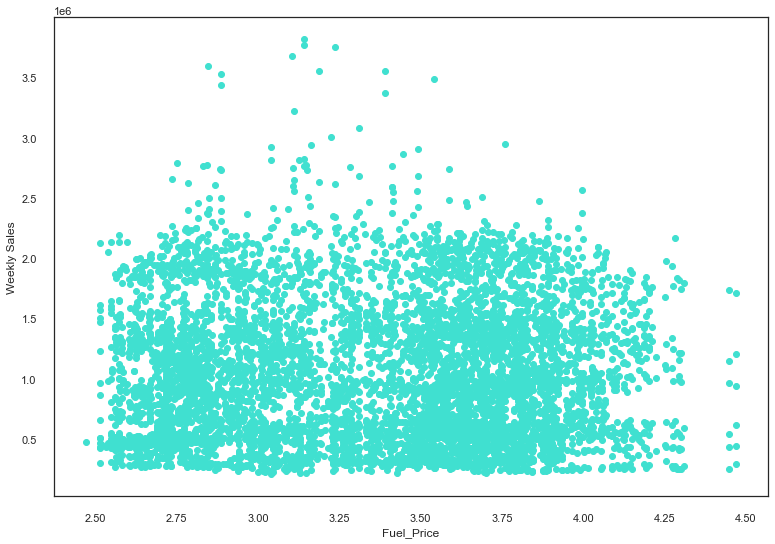

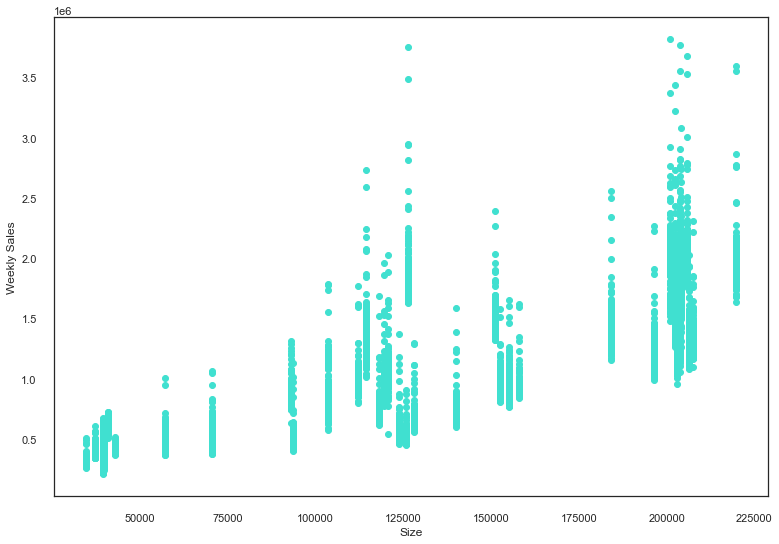

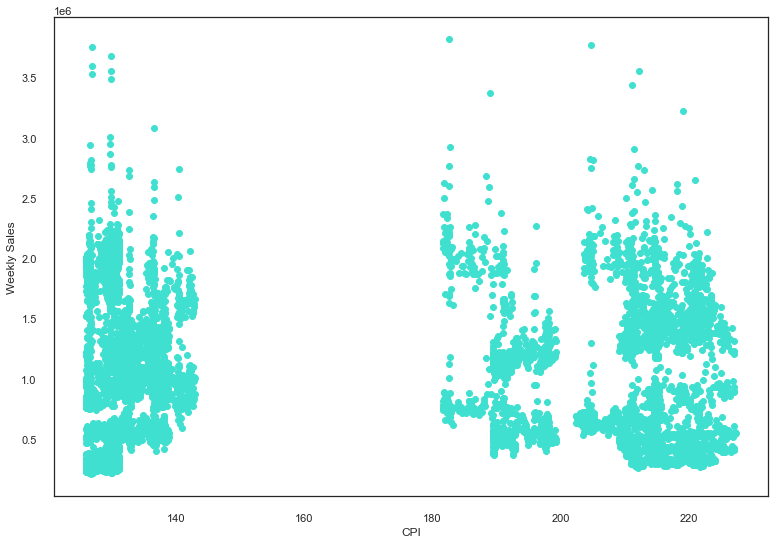

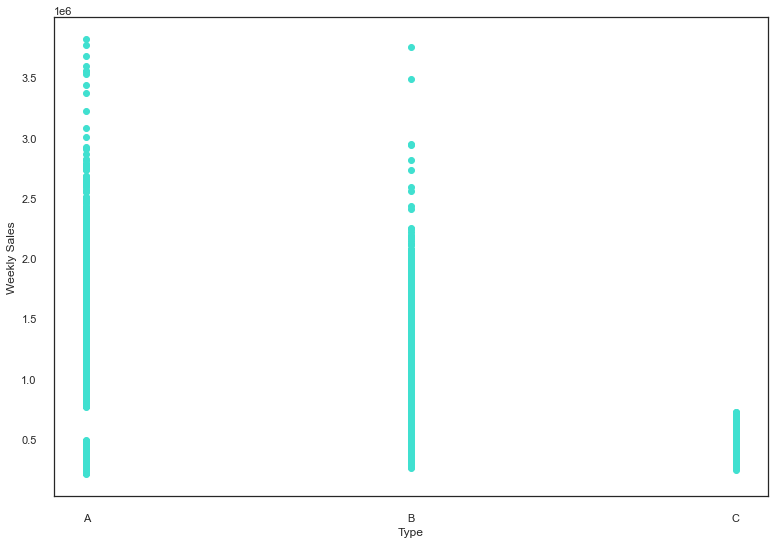

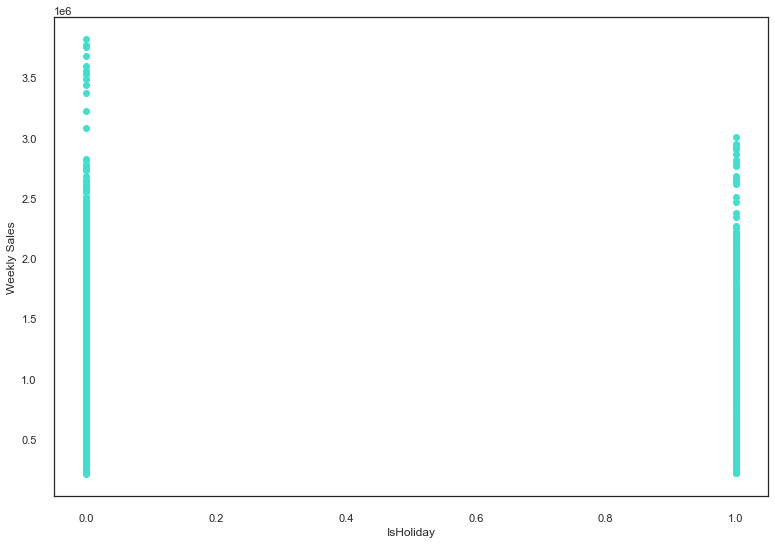

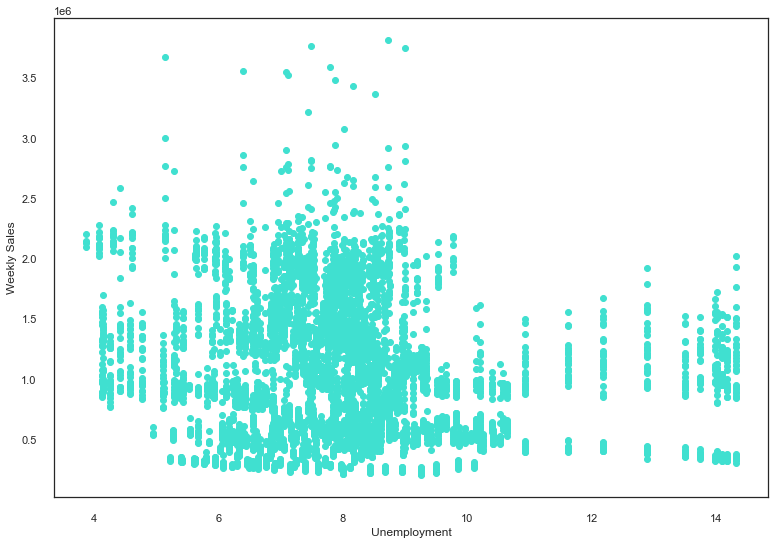

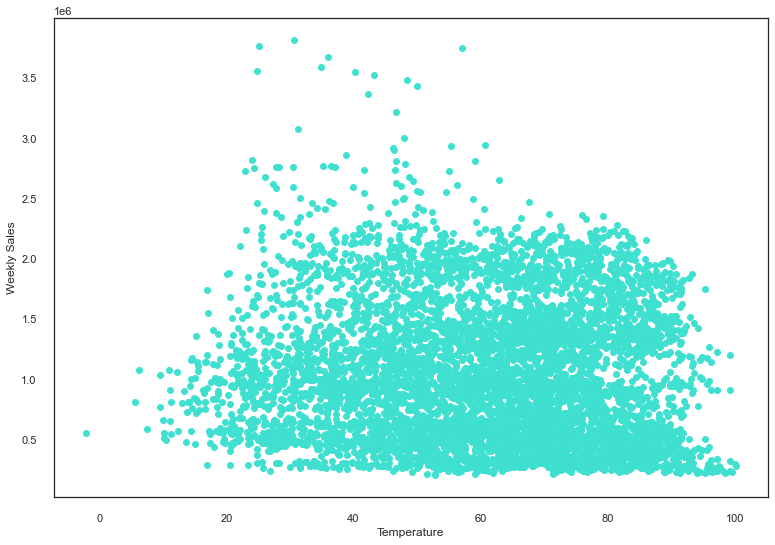

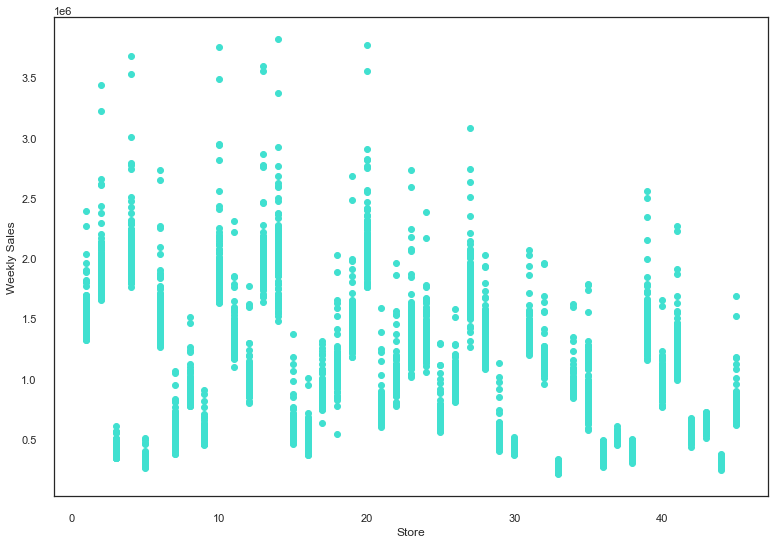

In [182]:
scatter(data, 'Fuel_Price')
scatter(data, 'Size')
scatter(data, 'CPI')
scatter(data, 'Type')
scatter(data, 'IsHoliday')
scatter(data, 'Unemployment')
scatter(data, 'Temperature')
scatter(data, 'Store')


# Key Findings with the analysis

There are 45 stores and 81 department in data. 
  

Although stores 10 and 35 have higher weekly sales values sometimes,It means that some areas has higher seasonal sales.

Stores has 3 types as A, B and C according to their sizes. Almost half of the stores are bigger than 150000 and categorized as A. 

As expected, holiday average sales are higher than normal dates.

Christmas holiday introduces as the last days of the year. But people generally shop at 51th week. So, when we look at the total sales of holidays, Thankgiving has higher sales 

Year 2010 has higher sales than 2011 and 2012. 

It is obviously seen that week 51 and 47 have higher values and 50-48 weeks follow them. 

Interestingly, The results show that Christmas, Thankgiving and Black Friday are very important than other weeks for sales and end of the May, when schools are closed. Most probably, people are preparing for holiday at the end of the May.


January sales are significantly less than other months. This is the result of November and December high sales. After two high sales month, people prefer to pay less on January.


CPI, temperature, unemployment rate and fuel price have no pattern on weekly sales.

# Model selection and Implementation

<p style="background-color:white;font-family:newtimeroman;color:blue;font-size:230%;text-align:center;border-radius:20px 60px;"> Time series analysis </p>

![](https://cloud.netlifyusercontent.com/assets/344dbf88-fdf9-42bb-adb4-46f01eedd629/69aa52fb-b692-463f-84c1-cde2470445ae/css-animation-craziness.gif)


We will consider one of the stores and perform a detailed time-series analysis on it

Store 4

In [203]:
data.head()

,Store,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1643690.90,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,1641957.44,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,1611968.17,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,1409727.59,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,1554806.68,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [204]:
data.set_index('Date', inplace=True)


In [205]:
store4 = data[data.Store == 4]
# there are about 45 different stores in this dataset.

sales4 = pd.DataFrame(store4.Weekly_Sales.groupby(store4.index).sum())
sales4.dtypes
sales4.head(20)

,Weekly_Sales
Date,
2010-02-05,2135143.87
2010-02-12,2188307.39
2010-02-19,2049860.26
2010-02-26,1925728.84
2010-03-05,1971057.44
2010-03-12,1894324.09
2010-03-19,1897429.36
2010-03-26,1762539.30
2010-04-02,1979247.12


In [206]:

#remove date from index to change its dtype because it clearly isnt acceptable.
sales4.reset_index(inplace = True)

In [207]:

#converting 'date' column to a datetime type
sales4['Date'] = pd.to_datetime(sales4['Date'])
# resetting date back to the index
sales4.set_index('Date',inplace = True)

In [214]:
# Lets take store 6 data for analysis
store6 = data[data.Store == 6]
# there are about 45 different stores in this dataset.

sales6 = pd.DataFrame(store6.Weekly_Sales.groupby(store6.index).sum())
sales6.dtypes
# Grouped weekly sales by store 6

#remove date from index to change its dtype because it clearly isnt acceptable.
sales6.reset_index(inplace = True)

#converting 'date' column to a datetime type
sales6['Date'] = pd.to_datetime(sales6['Date'])
# resetting date back to the index
sales6.set_index('Date',inplace = True)

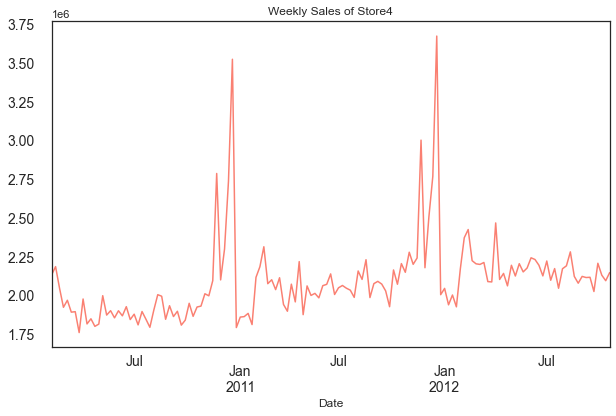

In [215]:
sales4.Weekly_Sales.plot(figsize=(10,6), title= 'Weekly Sales of Store4', fontsize=14, color = 'salmon')
plt.show()

aditive decomposition


<Figure size 921.6x633.6 with 0 Axes>

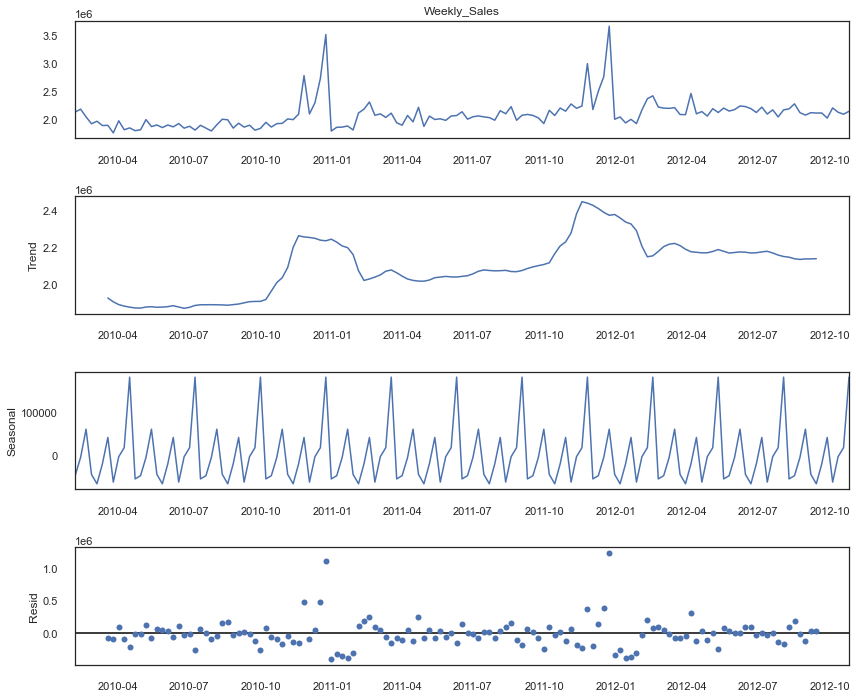

In [216]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sales4.Weekly_Sales, period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 10)
plt.show()

mutiplicative decomposition

<Figure size 921.6x633.6 with 0 Axes>

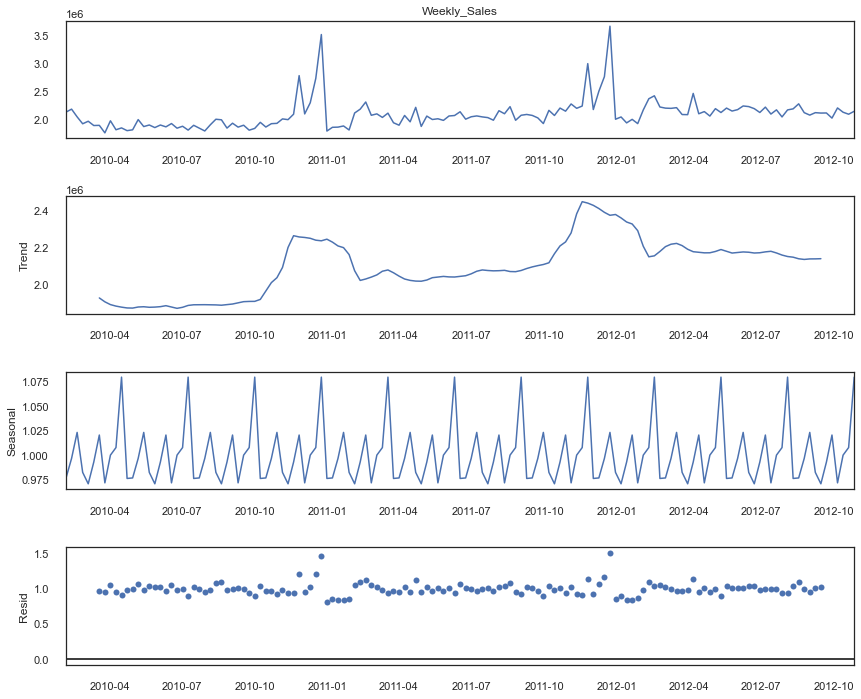

In [217]:
decomposition = seasonal_decompose(sales4.Weekly_Sales, model= 'multiplicative', period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 10)
plt.show()

In [218]:
y1=sales4.Weekly_Sales
y2=sales6.Weekly_Sales

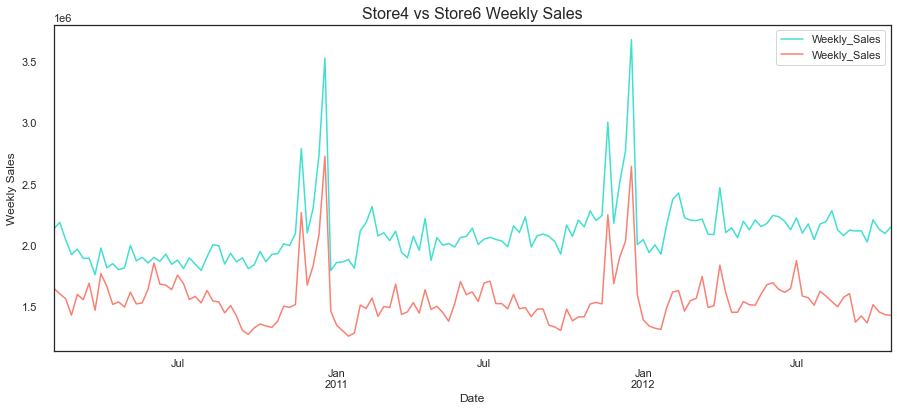

In [219]:
y1.plot(figsize=(15, 6), legend=True, color = 'turquoise')
y2.plot(figsize=(15, 6), legend=True, color = 'salmon')
plt.ylabel('Weekly Sales')
plt.title('Store4 vs Store6 Weekly Sales', fontsize = '16')
plt.show()


#both the stores have almost the same trends and spike just the magnitude is different.

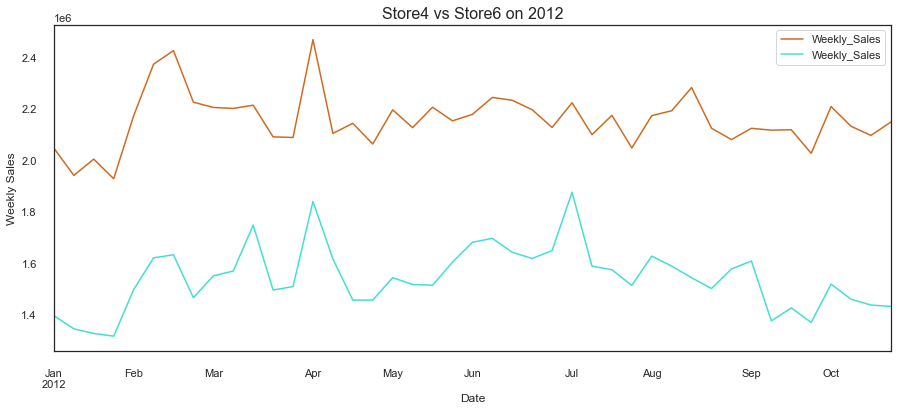

In [220]:
# Lets Look into 2012 data for a better view
y1['2012'].plot(figsize=(15, 6),legend=True, color = 'chocolate')
y2['2012'].plot(figsize=(15, 6), legend=True, color = 'turquoise')
plt.ylabel('Weekly Sales')
plt.title('Store4 vs Store6 on 2012', fontsize = '16')
plt.show()

# Machine Learning Models

# a) RandomForestRegressor

In [221]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
print('Successfully Imported Libraries')

Successfully Imported Libraries


In [222]:
forest_model = RandomForestRegressor() # model build


In [223]:
features = ['Store','IsHoliday','Temperature','Fuel_Price','CPI','Unemployment']
X = data[features]
y = data['Weekly_Sales']
train_X, test_X, train_y, test_y = train_test_split(X,y) # train test split
print('Success')

Success


In [224]:
forest_model.fit(train_X,train_y) #model fit
print('Success')

Success


The Mean Absolute Error

In [225]:
forest_sales_predictions = forest_model.predict(test_X)
random_forest_mae = metrics.mean_absolute_error(test_y,forest_sales_predictions)
print(random_forest_mae)

74582.91886743318


The Root Mean Squared Error



In [226]:
random_forest_rmse = np.sqrt(metrics.mean_squared_error(test_y,forest_sales_predictions))
print(random_forest_rmse)

134850.64478170837


# b) DecisionTreeRegressor

In [227]:
from sklearn.tree import DecisionTreeRegressor

In [232]:
model = DecisionTreeRegressor() # model build


In [238]:
def get_mae(max_leaf_nodes, train_X, test_X, train_y, test_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(test_X)
    mae = metrics.mean_absolute_error(test_y, preds_val)
    return(mae)

In [240]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
scores = {leaf_size: get_mae(leaf_size,train_X, test_X, train_y, test_y) for leaf_size in candidate_max_leaf_nodes}
best_tree_size =  min(scores, key=scores.get)
print(best_tree_size)

100


In [241]:
tree_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size,random_state=0)
tree_model.fit(train_X,train_y)
tree_model_predictions = tree_model.predict(test_X)

The Mean Absolute Error

In [243]:
decision_tree_mae = metrics.mean_absolute_error(test_y,tree_model_predictions)
print(decision_tree_mae)

86925.86508726802


The Root Mean Squared Error


In [244]:
decision_tree_rmse = np.sqrt(metrics.mean_squared_error(test_y,tree_model_predictions))
print(decision_tree_rmse)

163104.75125753824


# Plotting the two models

<AxesSubplot: xlabel='Weekly_Sales'>

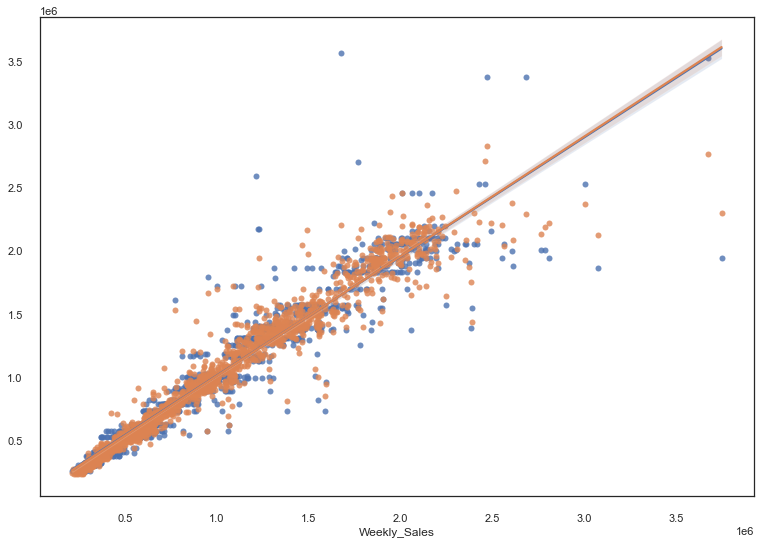

In [245]:
sns.regplot(x=test_y,y=tree_model_predictions)
sns.regplot(x=test_y, y=forest_sales_predictions)

The BLUE scatter plot was created by the DECISION TREE model
The ORANGE scatter plot was created by the RANDOM FOREST model

# Which Model Had The Greater Error Term?


In [246]:
print(((decision_tree_rmse-random_forest_rmse)/random_forest_rmse) * 100)
print(((decision_tree_mae-random_forest_mae)/random_forest_mae)*100)

20.952147853328146
16.54929360135892
